# Creating Hodograph Plots

This tutorial creates SounderPy Hodograph plots! 

#### Here we will explore:   
- Building hodographs
- Plots in dark mode
- Storm relative hodographs
- Saving hodograph plots to a file

In [1]:
# First lets import SounderPy. Its fun to import as 'spy'!
import sounderpy as spy


## ---------------------------------- SOUNDERPY ----------------------------------- ##
##          Vertical Profile Data Retrieval and Analysis Tool For Python            ##
##                     v3.0.5 | Sept 2024 | (C) Kyle J Gillett                      ##
##                 Docs: https://kylejgillett.github.io/sounderpy/                  ##
## --------------------- THANK YOU FOR USING THIS PACKAGE! ------------------------ ##



## Load some data to plot

Here we can load some data with SounderPy.

Let's investigate DTX (White Lake, MI) observations for a June tornado outbreak in 2015. We can use the `get_obs_data()` function to do this

In [2]:
clean_data = spy.get_obs_data('dtx', '2015', '06', '23', '00')

> OBSERVED DATA ACCESS FUNCTION
  -----------------------------------
    > PROFILE FOUND: DTX on 06/23/2015 at 00z | From UW
    > COMPLETE --------
    > RUNTIME: 00:00:20
    > SUMMARY: 00Z Launch for KDTX, DETROIT at 06-23-2015-00Z
 
    > THERMODYNAMICS --------------------------------------------- 
    --- SBCAPE: 3039.4 | MUCAPE: 3039.4 | MLCAPE: 2615.3 | MUECAPE: 2742.7
    --- MU 0-3: 99.9 | MU 0-6: 845.8 | SB 0-3: 99.9 | SB 0-6: 845.8
 
    > KINEMATICS ------------------------------------------------- 
    --- 0-500 SRW: 43.2 knot | 0-500 SWV: 0.032 | 0-500 SHEAR: 28.8 | 0-500 SRH: 308.0
    --- 1-3km SRW: 33.1 knot | 1-3km SWV: 0.013 | 1-3km SHEAR: 57.3 | | 1-3km SRH: 336.0
 


## Build a full hodograph plot

Here we use the most basic version of the `build_hodograph()` function.

> HODOGRAPH PLOTTER FUNCTION --
-------------------------------
> RUNTIME: 00:00:01


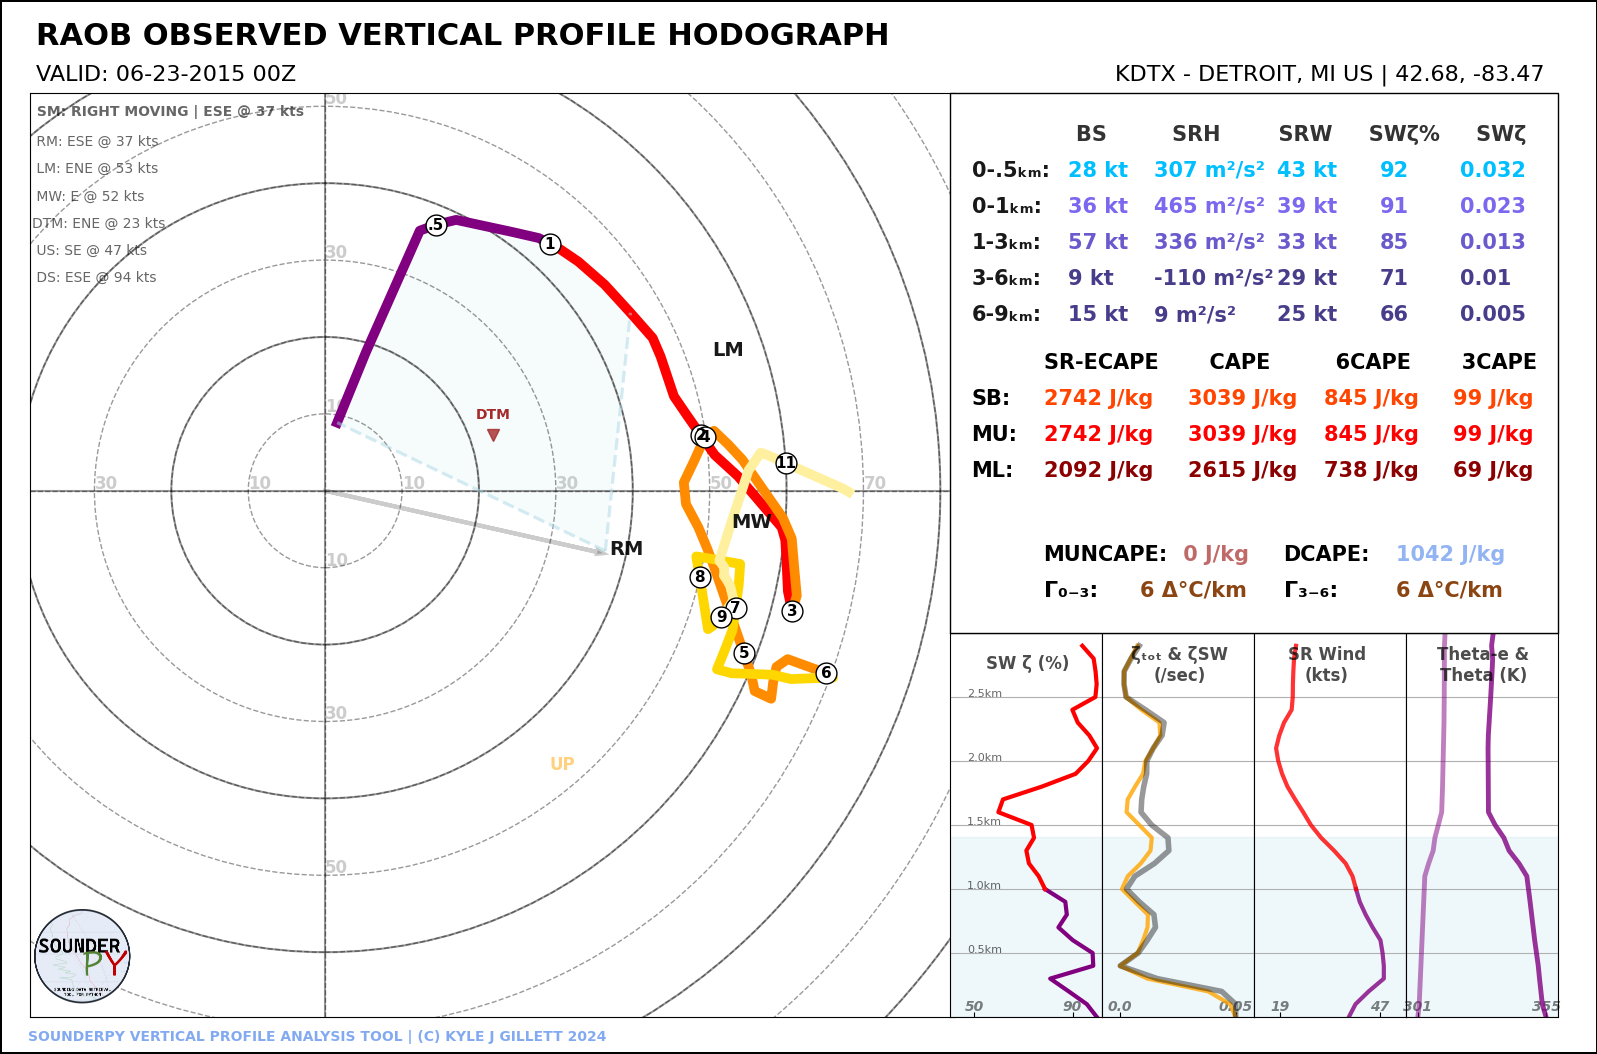

In [3]:
# light-mode hodograph
spy.build_hodograph(clean_data)

## Playing with hodograph settings

The plot above requried a very simple line of code. 

Now we can adjust a few settings to customize the plot a little bit.

To do so, let's first study the `build_hodograph()` function...

#### `build_hodograph(clean_data, dark_mode=False, storm_motion='right_moving' sr_hodo=False, modify_sfc=None, save=False, filename='sounderpy_sounding')`

where:

- `clean_data` (dict, required) – the dictionary of data to be plotted

- `dark_mode` (bool, optional) – True will invert the color scheme for a ‘dark-mode’ sounding. Default is False.

- `storm_motion` (str or list of floats, optional) – the storm motion used for plotting and calculations. Default is ‘right_moving’. Custom storm motions are accepted as a list of floats representing direction and speed. Ex: [270.0, 25.0] where ‘270.0’ is the direction in degrees and ‘25.0’ is the speed in kts. See the documentation for more details.

- `sr_hodo` (bool, optional, default is False) – transform the hodograph from ground relative to storm relative

- `save` (bool, optional) – whether to show the plot inline or save to a file. Default is False which displays the file inline.

- `filename` (str, optional) – the filename by which a file should be saved to if save = True. Default is 'sounderpy_sounding'.

- `modify_sfc`: (None or dict, optional, default is None) - a `dict` in the format ``{'T': 25, 'Td': 21, 'ws': 20, 'wd': 270}`` to modify the surface values of the ``clean_data`` dict. See the documentation for more details.



Lets try the `dark_mode` setting:

> HODOGRAPH PLOTTER FUNCTION --
-------------------------------
> RUNTIME: 00:00:01


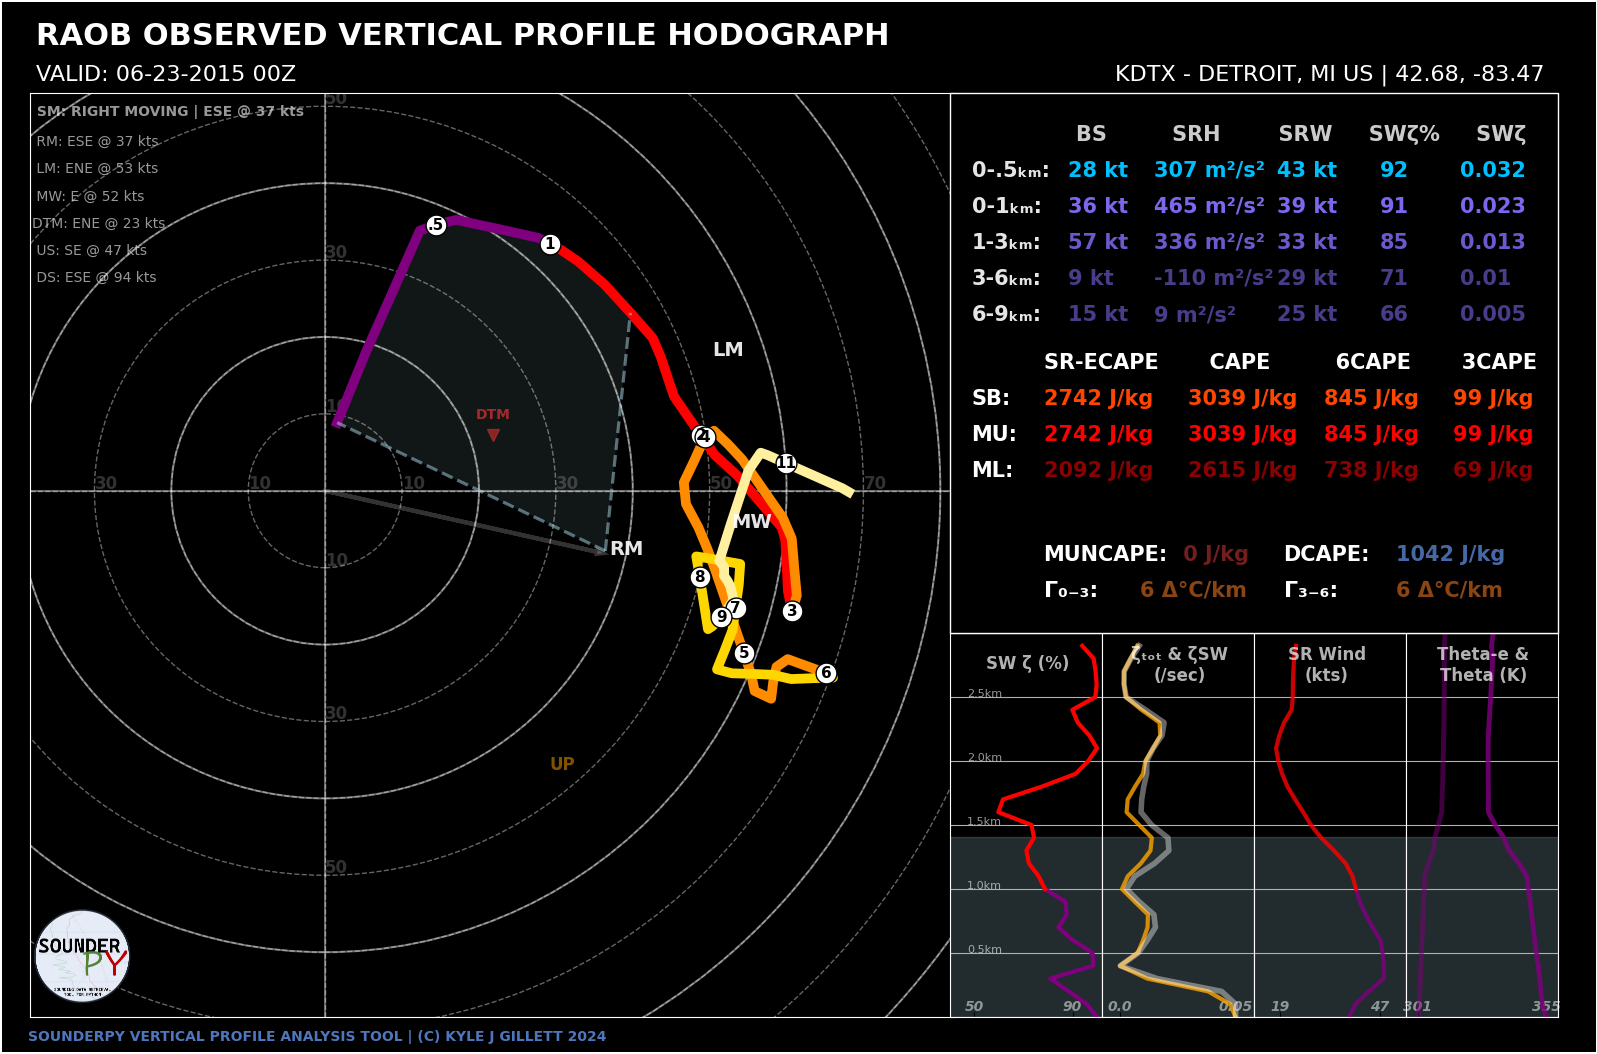

In [4]:
# dark_mode turned on!
spy.build_hodograph(clean_data, dark_mode=True)

## Storm relative hodographs

A storm-relative hodograph is a hodograph centered on the storm-motion. In this way we can think more about what the "storm feels". 

A storm-relative hodograph "normalizes all of the seemingly-infinite hodograph shapes into what the supercell actually experiences" - Cameron J Nixon (read more here: https://cameronjnixon.wordpress.com/research/hodographs/)

To create a SounderPy storm relative hodograph, simply use the `sr_hodo` kwarg, set it equl to `True`. 

**NOTE**
- This will only work if a storm motion exists. 
- The storm motion defaults to Bunkers Right Moving, but this can be changed with the `storm_motion` kwarg.
- A vertical profile must be over 6km tall for the Bunkers calculation to work, so profiles below this height will still be 'ground-relative'

> HODOGRAPH PLOTTER FUNCTION --
-------------------------------
> RUNTIME: 00:00:01


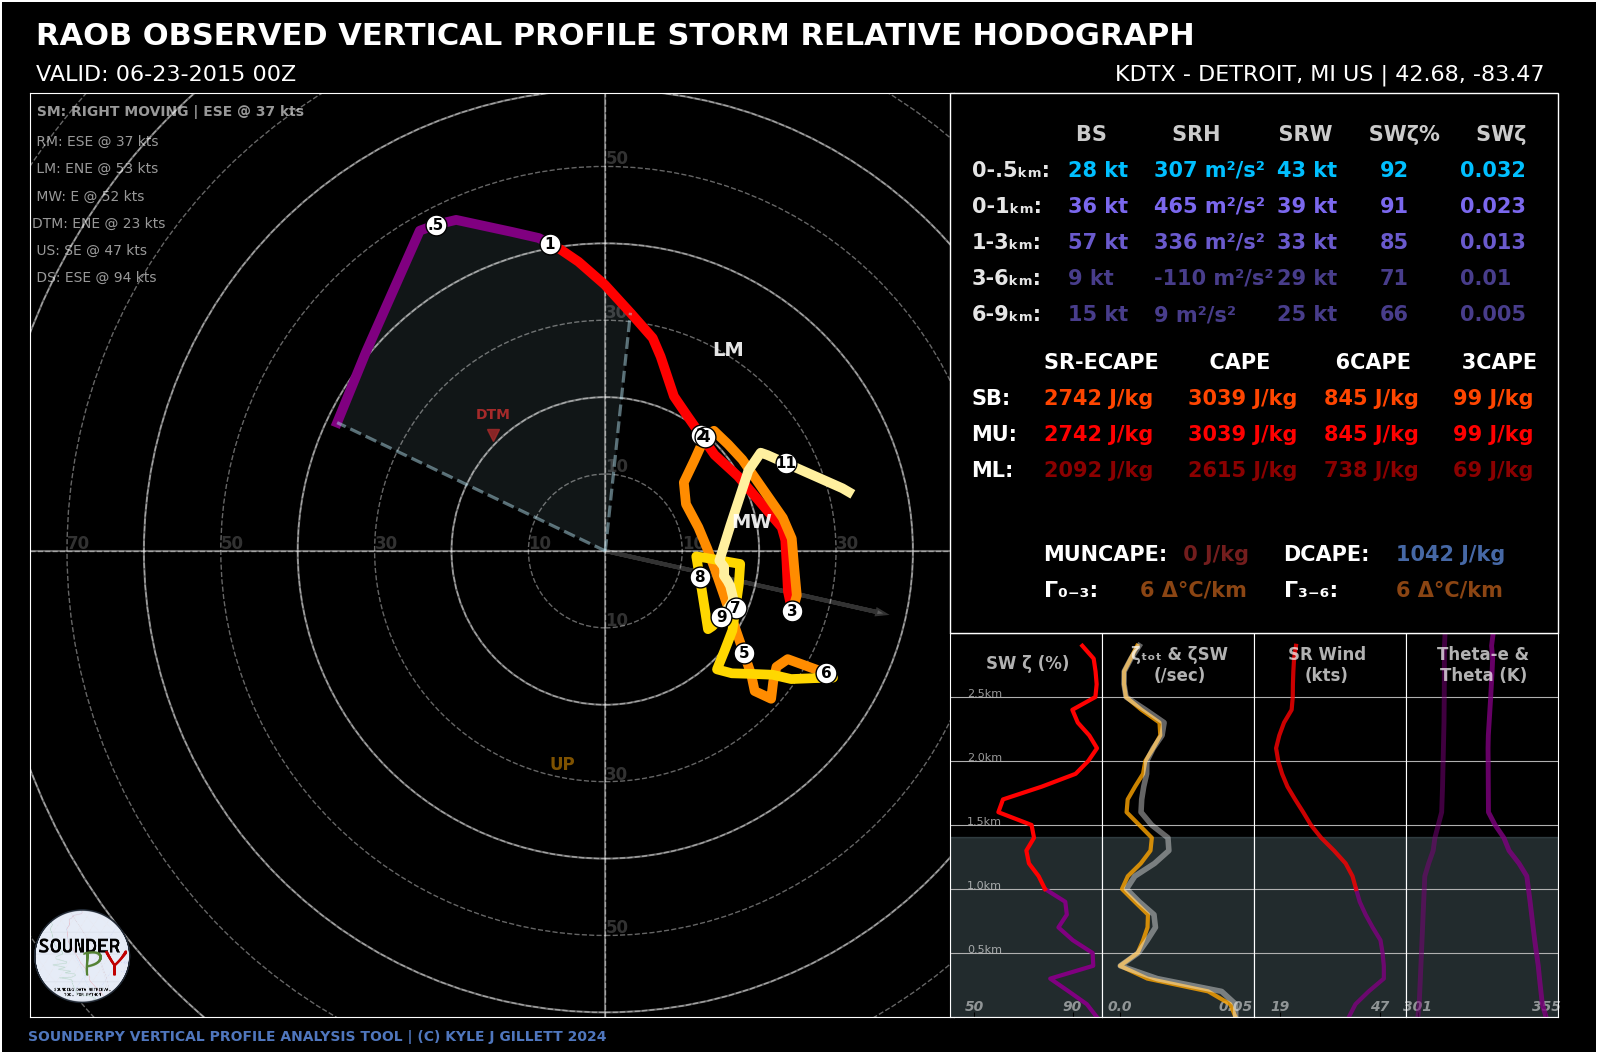

In [5]:
# storm-relative hodograph!
spy.build_hodograph(clean_data, dark_mode=True, sr_hodo=True)

## Saving plots as a file

By default, SounderPy is set to show plots inline. If you want/need to save them to a file, SounderPy offers that option! 

Just set the `save` kwarg to True, and give it a file name using the `filename` kwarg! 

### IMPORTANT NOTE!!!

- If your plots come out with a funky layout when displaying them inline, it may be due to your screen resolution. 
- In the event that this is the case, simply use the `save=True` option to save plots to a file!

In [7]:
#spy.build_hodograph(clean_data, save=True, filename='sounderpy_2015062300z_DTX')